# Deep Learning Assignment
**Instructions:** You have recently watched the first four videos of the 3Blue1Brown deep learning series and the basics of Pytorch videos. This assignment will test your understanding of the concepts presented in those videos. Please answer the questions thoroughly, and write your code in Python using popular deep learning libraries like TensorFlow or PyTorch.


## Theoretical Questions


### 1. Neural Network Basics:
Explain the following terms in the context of neural networks:
 1. Neuron: 
 2. Activation Function:
 3. Weights and Biases:
 4. Feedforward Process:
 5. Backpropagation:


Neuron: A neuron is the basic computational unit in a neural network. It takes inputs, weights, and biases as parameters, computes an intermediary output (a weighted sum of the inputs), and then applies an activation function to produce the final output. This process allows neurons to pass transformed information to subsequent layers.

Activation Function: The activation function introduces non-linearity into the neural network, setting it apart from a simple linear regression model. Each neuron applies the activation function to its output. The primary purpose is to enable the network to learn and model complex patterns in data. Without the activation function, no matter how many layers are added, the model would remain linear, limiting its ability to solve non-linear problems.

Weights and Biases: These are the learnable parameters of a neural network. Initially, weights and biases are assigned random or predefined values. During training, they are updated using the gradients of the loss function, computed through backpropagation. The gradients guide how weights and biases should adjust to minimize the loss, and an optimization algorithm like gradient descent fine-tunes them, with the learning rate controlling the update magnitude. Over time, this process allows the network to learn the optimal parameters for making accurate predictions by reducing error.

Feedforward Process: This refers to the flow of input data through the neural network, layer by layer, to produce an output, without any feedback or looping. In each layer, neurons take inputs, compute a weighted sum, add biases, and apply an activation function to generate an output, which is then passed to the next layer.

Backpropagation: Backpropagation is the key process through which the network learns and improves its performance. It involves calculating the gradient of the loss function with respect to the weights and biases, starting from the output layer and moving backward through the network. This process updates the parameters to minimize errors, often using an optimization algorithm such as gradient descent. It allows the model to adjust its weights and biases based on the error, enabling it to better fit the data with each iteration.

### 2. Visualizing Neural Networks:
Based on the videos, why is visualizing neural networks as "function layers" a useful way to understand their operation? Provide an example of how a simple neural network might be visualized this way and what each layer represents.


Visualizing neural networks as "function layers" helps us simplify and understand their complex structure in a more intuitive and manageable way. By breaking the network into discrete layers, each performing a specific function, we can better comprehend how the network operates as a whole. This approach allows us to examine each layer individually, providing clarity on its role, inputs, outputs, and the transformations it applies to the data. It gives us a detailed understanding of how data flows through the network, how it is processed at each step, and how the model learns and improves through training. This visualization helps in analyzing and optimizing the model more effectively.

Each layer of the network receives certain inputs with multiple features, applies its own learnable parameters (weights and biases), and passes the result through an activation function to produce an output. This helps the layer progressively extract meaningful patterns from the data. Furthermore, all the layers together work in harmony to enable the entire model to understand the dataset better and make more accurate predictions on unseen inputs.

Example of visualizing a simple 3-layer neural network:

**Input Layer:** This layer receives the raw input data (e.g., features from a dataset) and passes it directly to the hidden layer without any transformation or learning.

**Hidden Layer:** This layer takes the input from the previous layer, processes it using the weights, biases, and an activation function (like ReLU), and produces a transformed output. It helps extract meaningful features from the input data. The output is then passed to the output layer.

**Output Layer:** The output layer takes the processed data from the hidden layer, applies further transformations, and produces the final prediction (e.g., a probability score for classification). After this, backpropagation begins, updating the weights and biases in each layer to minimize the loss and improve the model’s performance.

## Coding Questions


Run the below cells before running/doing the other to install all the dependancies for the assignment

In [ ]:
%pip install numpy
%pip install matplotlib
%pip install torch

### 1. Implementing a Single Neuron:
- Write a Python function that simulates a single neuron. The function should take a list of inputs, weights, and a bias, and return the output using a sigmoid activation function.


In [5]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

def single_neuron(inputs, weights, bias):
    # Calculate the weighted sum of inputs plus the bias
    ans = np.dot(inputs, weights) + bias
    # Apply the sigmoid activation function to the result
    return sigmoid(ans)

# Example usage
inputs = [0.5, 0.6, 0.1]
weights = [0.4, 0.3, 0.8]
bias = -0.1
output = single_neuron(inputs, weights, bias)
print('Output:', output)

Output: 0.5890404340586651


### 2. Building a Simple Neural Network:
Using a deep learning library (PyTorch), build a simple neural network with one hidden layer. Use this network to perform binary classification on a small dataset (the XOR dataset). Remember the activation function you are supposed to use is the Sigmoid function, use the one given by pytorch itself, no need to refer to Q1


In [10]:
class SimpleNN(nn.Module):
    def __init__(self, hidden_size, input_size):
        super(SimpleNN, self).__init__()
        # First linear layer 
        self.l1 = nn.Linear(input_size, hidden_size)  
        # Sigmoid activation function for non-linearity
        self.sig = nn.Sigmoid()
        # Second linear layer 
        self.l2 = nn.Linear(hidden_size, 1)
    
    # Forward pass function
    def forward(self, x):
        out = self.l1(x)  # first linear transformation
        out = self.sig(out)  # sigmoid activation function to hidden layer output
        out = self.l2(out)  # second linear transformation
        y_pred = self.sig(out)  # sigmoid activation to output layer for final prediction
        return y_pred

# defining the model
model = SimpleNN(hidden_size=4, input_size=2)  # 4 hidden neurons, 2 input features

# Loss function and optimizer
lr = 0.001  # Learning rate
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification tasks
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  # Adam optimizer for backpropagation

# Train the model
for epoch in range(5000):  
    y_pred = model(X)  # Forward pass
    loss = criterion(y_pred, y)  # Compute loss between predicted and actual outputs
    
    optimizer.zero_grad()  # Clear gradients from the previous step
    loss.backward()  # Backpropagation of the gradients 
    optimizer.step()  # Update weights using the optimizer (Adam)
    
    # Print the loss every 500 epochs to monitor training progress
    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.2f}')

with torch.no_grad():
    predictions = model(X)
    predictions = predictions.round()
    accuracy = (predictions == y).float().mean()
    print(f'Model Accuracy: {accuracy.item() * 100:.2f}%')

Epoch [500/5000], Loss: 0.67
Epoch [1000/5000], Loss: 0.51
Epoch [1500/5000], Loss: 0.35
Epoch [2000/5000], Loss: 0.24
Epoch [2500/5000], Loss: 0.18
Epoch [3000/5000], Loss: 0.13
Epoch [3500/5000], Loss: 0.10
Epoch [4000/5000], Loss: 0.08
Epoch [4500/5000], Loss: 0.06
Epoch [5000/5000], Loss: 0.05
Model Accuracy: 100.00%


### 3. Visualizing the Learning Process:
Modify the neural network code from Question 2 to record the loss at each epoch. Plot the loss over epochs using Matplotlib to visualize how the network learns over time.


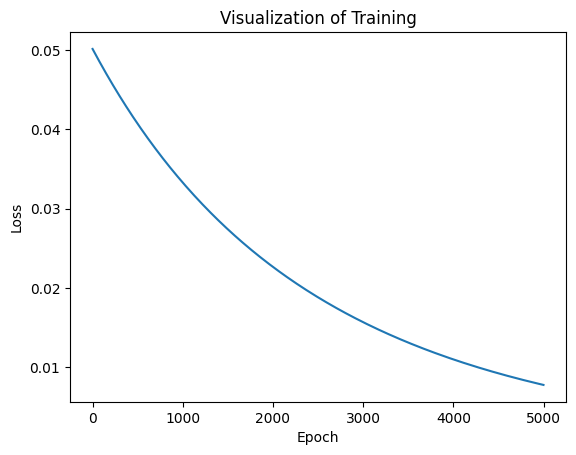

In [11]:
import matplotlib.pyplot as plt

losses = []

# Train the model and record the loss
for epoch in range(5000):
    y_pred=model(X)
    loss=criterion(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.plot(losses,label='Training loss')
plt.title('Visualization of Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the loss over epochs


## Submission Instructions:
- Answer the theoretical questions in a separate markdown
- Include comments in your code to explain your implementation.
